# Sketch refinemnet
## same base model: stable-diffusion-xl-base-1.0
## different adapters (4 in total)

**TencentARC/t2i-adapter-lineart-sdxl-1.0**

In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git@t2iadapterxl # for now
!pip install -U controlnet_aux==0.0.7 # for conditioning models and detectors
!pip install transformers accelerate safetensors
!pip install mediapipe


  Cloning https://github.com/huggingface/diffusers.git (to revision t2iadapterxl) to /tmp/pip-req-build-mpfc634o
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-mpfc634o
  Running command git checkout -b t2iadapterxl --track origin/t2iadapterxl
  Switched to a new branch 't2iadapterxl'
  Branch 't2iadapterxl' set up to track remote branch 't2iadapterxl' from 'origin'.
  Resolved https://github.com/huggingface/diffusers.git to commit e2e633635eb27a133d17cc8faa2a3bfc304dca1c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.21.0.dev0-py3-none-any.whl size=1379908 sha256=7e62eaf1be45fca56b366193866a39856fa2b25b979d681a1868bd81adb8bb79
  Stored in directory: /tmp/pip-ephem-wheel-cache-f4etb56u/wheels/e4/a2/c3/7fae834b1e87cfbb83f2852a07d2def8910071c4e66bea8a62
Successfully built diffuse

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# # cuda 11.8 version
# !pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118
# # cuda 12.1 version
# !pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu121
# !pip install xformers
# cuda 11.8 version
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118
# cuda 12.1 version
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in indexes: https://download.pytorch.org/whl/cu121


# Model 1
## stable-diffusion-xl-base-1.0
### adapter: TencentARC/t2i-adapter-lineart-sdxl-1.0

In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from controlnet_aux.lineart import LineartDetector
import torch

# load adapter
adapter = T2IAdapter.from_pretrained(
  "TencentARC/t2i-adapter-lineart-sdxl-1.0", torch_dtype=torch.float16, varient="fp16"
).to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
    model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

line_detector = LineartDetector.from_pretrained("lllyasviel/Annotators").to("cuda")

/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_21m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#url = "/content/360_F_381436348_vvjNh7RqvkwPDsUeW3qLLP4dzrU8JGf4.jpg"
url = "/content/exp4.jpg"
image = load_image(url)
image = line_detector(
    image, detect_resolution=384, image_resolution=1024
)

In [ ]:
prompt = "Young man with white hair and blue eyes. Black clothes. beautiful face. Sky blue background."
negative_prompt = "graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured"
gen_images = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=image,
    num_inference_steps=30,
    adapter_conditioning_scale=0.8,
    guidance_scale=7.5,
).images[0]
gen_images.save('out_lin.png')


  0%|          | 0/30 [00:00<?, ?it/s]

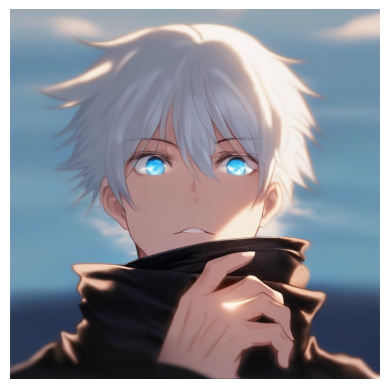

In [ ]:
image_path = '/content/out_lin.png'  # Replace this with the path to your .png image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

**openpose_sdxl_1.0**
# Model 1 (different adapter)
## stable-diffusion-xl-base-1.0
### adapter: TencentARC/t2i-adapter-openpose-sdxl-1.0

In [ ]:
!pip install -U git+https://github.com/huggingface/diffusers.git
!pip install -U controlnet_aux==0.0.7 # for conditioning models and detectors
!pip install transformers accelerate safetensors
!pip install mediapipe
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-9l9g26vz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-9l9g26vz
  Resolved https://github.com/huggingface/diffusers.git to commit 6d2e19f7466b70574209d3da4488e16610c4fac6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.24.0.dev0-py3-none-any.whl size=1717201 sha256=3f68223c5ecfd298ab94cd1d63addba402e7139509e74f830ed7e991c784cf9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-1cf6pnsv/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.21.0.dev0
    Uninstalling diffusers-0.21.0.dev0:
      Successfully uninstalled diffusers-0.21.0.dev0


In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
import torch
import numpy as np
from PIL import Image

# load adapter
adapter = T2IAdapter.from_pretrained(
  "TencentARC/t2i-adapter-openpose-sdxl-1.0", torch_dtype=torch.float16
).to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
    model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

open_pose = OpenposeDetector.from_pretrained("lllyasviel/Annotators")


/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_21m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
url = "/content/gen_compare_control_images_converted_control_human_openpose.jpg"
image = load_image(url)
image = open_pose(image, detect_resolution=512, image_resolution=1024)
image = np.array(image)[:, :, ::-1]
image = Image.fromarray(np.uint8(image))


In [ ]:
prompt = "Young man with white hair and blue eyes. Black clothes. beautiful face. Sky blue background."
negative_prompt = "graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured"

gen_images = pipe(
  prompt=prompt,
  negative_prompt=negative_prompt,
  image=image,
  num_inference_steps=30,
  adapter_conditioning_scale=1,
  guidance_scale=7.5,
).images[0]
gen_images.save('out_pose.png')

  0%|          | 0/30 [00:00<?, ?it/s]

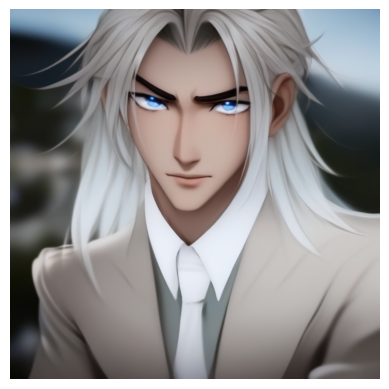

In [ ]:
image_path = '/content/out_pose.png'  # Replace this with the path to your .png image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

**TencentARC/t2i-adapter-sketch-sdxl-1.0**
# Model 1 (different adapter)
## stable-diffusion-xl-base-1.0
### adapter: TencentARC/t2i-adapter-sketch-sdxl-1.0

In [ ]:
!pip install -U git+https://github.com/huggingface/diffusers.git
!pip install -U controlnet_aux==0.0.7 # for conditioning models and detectors
!pip install transformers accelerate safetensors
!pip install mediapipe
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-zklwuy83
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-zklwuy83
  Resolved https://github.com/huggingface/diffusers.git to commit 6d2e19f7466b70574209d3da4488e16610c4fac6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from controlnet_aux.pidi import PidiNetDetector
import torch

# load adapter
adapter = T2IAdapter.from_pretrained(
  "TencentARC/t2i-adapter-sketch-sdxl-1.0", torch_dtype=torch.float16, varient="fp16"
).to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
    model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

pidinet = PidiNetDetector.from_pretrained("lllyasviel/Annotators").to("cuda")


/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_21m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
url = "/content/exp4.jpg"
image = load_image(url)
image = pidinet(
  image, detect_resolution=1024, image_resolution=1024, apply_filter=True
)


/usr/local/lib/python3.10/dist-packages/controlnet_aux/pidi/model.py:334: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:83.)
  buffer = torch.cuda.FloatTensor(shape[0], shape[1], 5 * 5).fill_(0)


In [ ]:
prompt = "Young man with white hair and blue eyes. Black clothes. beautiful face. Sky blue background."
negative_prompt = "graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured"

gen_images = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=image,
    num_inference_steps=30,
    adapter_conditioning_scale=0.9,
    guidance_scale=7.5,
).images[0]
gen_images.save('out_sketch.png')


  0%|          | 0/30 [00:00<?, ?it/s]

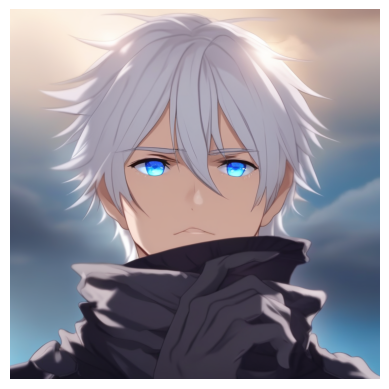

In [ ]:
image_path = '/content/out_sketch.png'  # Replace this with the path to your .png image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

**TencentARC/t2i-adapter-canny-sdxl-1.0**
# Model 1 (different adapter)
## stable-diffusion-xl-base-1.0
### adapter: *TencentARC/t2i-adapter-canny-sdxl-1.0


In [ ]:
!pip install -U git+https://github.com/huggingface/diffusers.git
!pip install -U controlnet_aux==0.0.7 # for conditioning models and detectors
!pip install transformers accelerate safetensors
!pip install mediapipe
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-5wu_nhtb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-5wu_nhtb
  Resolved https://github.com/huggingface/diffusers.git to commit 6d2e19f7466b70574209d3da4488e16610c4fac6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from controlnet_aux.canny import CannyDetector
import torch

# load adapter
adapter = T2IAdapter.from_pretrained("TencentARC/t2i-adapter-canny-sdxl-1.0", torch_dtype=torch.float16, varient="fp16").to("cuda")

# load euler_a scheduler
model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
vae=AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
    model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()

canny_detector = CannyDetector()

/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_21m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This 

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
url = "/content/exp4.jpg"
image = load_image(url)

# Detect the canny map in low resolution to avoid high-frequency details
image = canny_detector(image, detect_resolution=384, image_resolution=1024)#.resize((1024, 1024))

In [ ]:
prompt = "Young man with white hair and blue eyes. Black clothes. beautiful face. Sky blue background."
negative_prompt = "graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured"
gen_images = pipe(
  prompt=prompt,
  negative_prompt=negative_prompt,
  image=image,
  num_inference_steps=30,
  guidance_scale=7.5,
  adapter_conditioning_scale=0.8,
  adapter_conditioning_factor=1
).images[0]
gen_images.save('out_canny.png')

  0%|          | 0/30 [00:00<?, ?it/s]

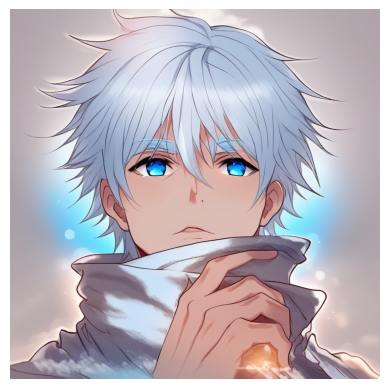

In [ ]:
image_path = '/content/out_canny.png'  # Replace this with the path to your .png image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [3]:
from diffusers import StableDiffusionXLAdapterPipeline, T2IAdapter, EulerAncestralDiscreteScheduler, AutoencoderKL
from diffusers.utils import load_image
from controlnet_aux.lineart import LineartDetector
import torch

def refine(text_prompt, image_path):
    # Load adapter
    adapter = T2IAdapter.from_pretrained(
        "TencentARC/t2i-adapter-lineart-sdxl-1.0", torch_dtype=torch.float16, variant="fp16"
    ).to("cuda")

    # Load scheduler and VAE
    model_id = 'stabilityai/stable-diffusion-xl-base-1.0'
    euler_a = EulerAncestralDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
    
    # Load pipeline
    pipe = StableDiffusionXLAdapterPipeline.from_pretrained(
        model_id, vae=vae, adapter=adapter, scheduler=euler_a, torch_dtype=torch.float16, variant="fp16",
    ).to("cuda")
    pipe.enable_xformers_memory_efficient_attention()

    # Load and process the line art detector
    line_detector = LineartDetector.from_pretrained("lllyasviel/Annotators").to("cuda")
    image = load_image(image_path)
    image = line_detector(image, detect_resolution=384, image_resolution=1024)

    # Define negative prompt
    negative_prompt = "graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured"
    
    # Generate images
    gen_images = pipe(
        prompt=text_prompt,
        negative_prompt=negative_prompt,
        image=image,
        num_inference_steps=30,
        adapter_conditioning_scale=0.8,
        guidance_scale=7.5,
    ).images[0]
    
    output_path = f"static/Images/refined_{hash(image_path)}.png"
    gen_images.save(output_path)

    return output_path


C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\controlnet_aux\segment_anything\modeling\tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_21m_224 in registry with controlnet_aux.segme

In [6]:
refine('oung man with white hair and blue eyes. Black clothes. beautiful face. Sky blue background', 'static/Images/input-image.jpg')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ValueError: Incorrect path or url, URLs must start with `http://` or `https://`, and ./static/Images/input-image.jpg is not a valid path